In [1]:
import numpy as np
import scipy as sp
from scipy import signal
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

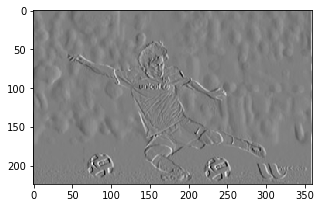

In [2]:
img = cv2.imread('messi.jpg', 0) # Load in grayscale
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
img_x = sp.signal.fftconvolve(img, sobel_x, mode='same')
plt.figure(figsize=(5,5))
plt.imshow(img_x,'gray')


# FFT Image

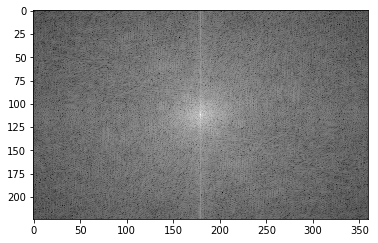

In [3]:
f = np.fft.fft2(img)
f=  np.fft.fftshift(f)

plt.imshow(np.log(np.abs(f)+1), 'gray')

# FFT Kernel

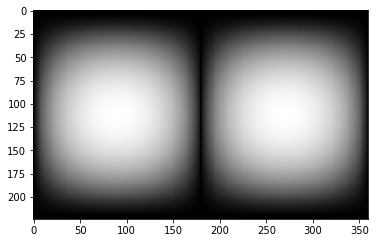

In [4]:
sobel_x_padded = np.zeros(f.shape)

sobel_x_padded[:sobel_x.shape[0], :sobel_x.shape[1]] = sobel_x

S = np.fft.fft2(sobel_x_padded)
S = np.fft.fftshift(S)

plt.imshow(np.log(np.abs(S)+1), 'gray')


# FFT Filter Image

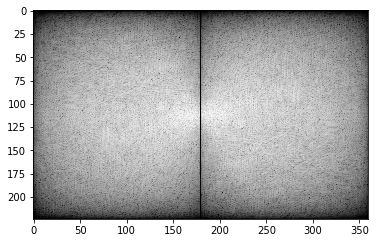

In [5]:
fft_filter_image = np.multiply(S,f)
plt.imshow(np.log(np.abs(fft_filter_image)+1), 'gray')

# Inverse

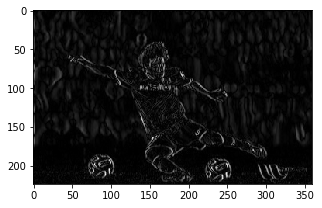

In [6]:
I =  np.fft.ifftshift(fft_filter_image)
img_back = np.fft.ifft2(I)
img_back = np.abs(img_back)
plt.figure(figsize=(5,5))
plt.imshow(img_back, 'gray')